# Quick Review of scikit-learn

<a href="https://colab.research.google.com/github/thomasjpfan/ml-workshop-intermediate-1-of-2/blob/master/notebooks/00-review-sklearn.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [1]:
# Install dependencies for google colab
import sys
if 'google.colab' in sys.modules:
    %pip install -r https://raw.githubusercontent.com/thomasjpfan/ml-workshop-intermediate-1-of-2/master/requirements.txt

In [2]:
import sklearn
assert sklearn.__version__.startswith("1.0"), "Plese install scikit-learn 1.0"

In [3]:
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.2,
              rc={"figure.figsize": [10, 6]})
sklearn.set_config(display="diagram")

In [4]:
from sklearn.datasets import fetch_openml

steel = fetch_openml(data_id=1504, as_frame=True)

In [5]:
print(steel.DESCR)

**Author**: Semeion, Research Center of Sciences of Communication, Rome, Italy.     
**Source**: [UCI](http://archive.ics.uci.edu/ml/datasets/steel+plates+faults)     
**Please cite**: Dataset provided by Semeion, Research Center of Sciences of Communication, Via Sersale 117, 00128, Rome, Italy.  

**Steel Plates Faults Data Set**  
A dataset of steel plates' faults, classified into 7 different types. The goal was to train machine learning for automatic pattern recognition.

The dataset consists of 27 features describing each fault (location, size, ...) and 7 binary features indicating the type of fault (on of 7: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults). The latter is commonly used as a binary classification target ('common' or 'other' fault.)

### Attribute Information  
* V1: X_Minimum  
* V2: X_Maximum  
* V3: Y_Minimum  
* V4: Y_Maximum  
* V5: Pixels_Areas  
* V6: X_Perimeter  
* V7: Y_Perimeter  
* V8: Sum_of_Luminosity  
* V9: Minimum_of_Luminosity  


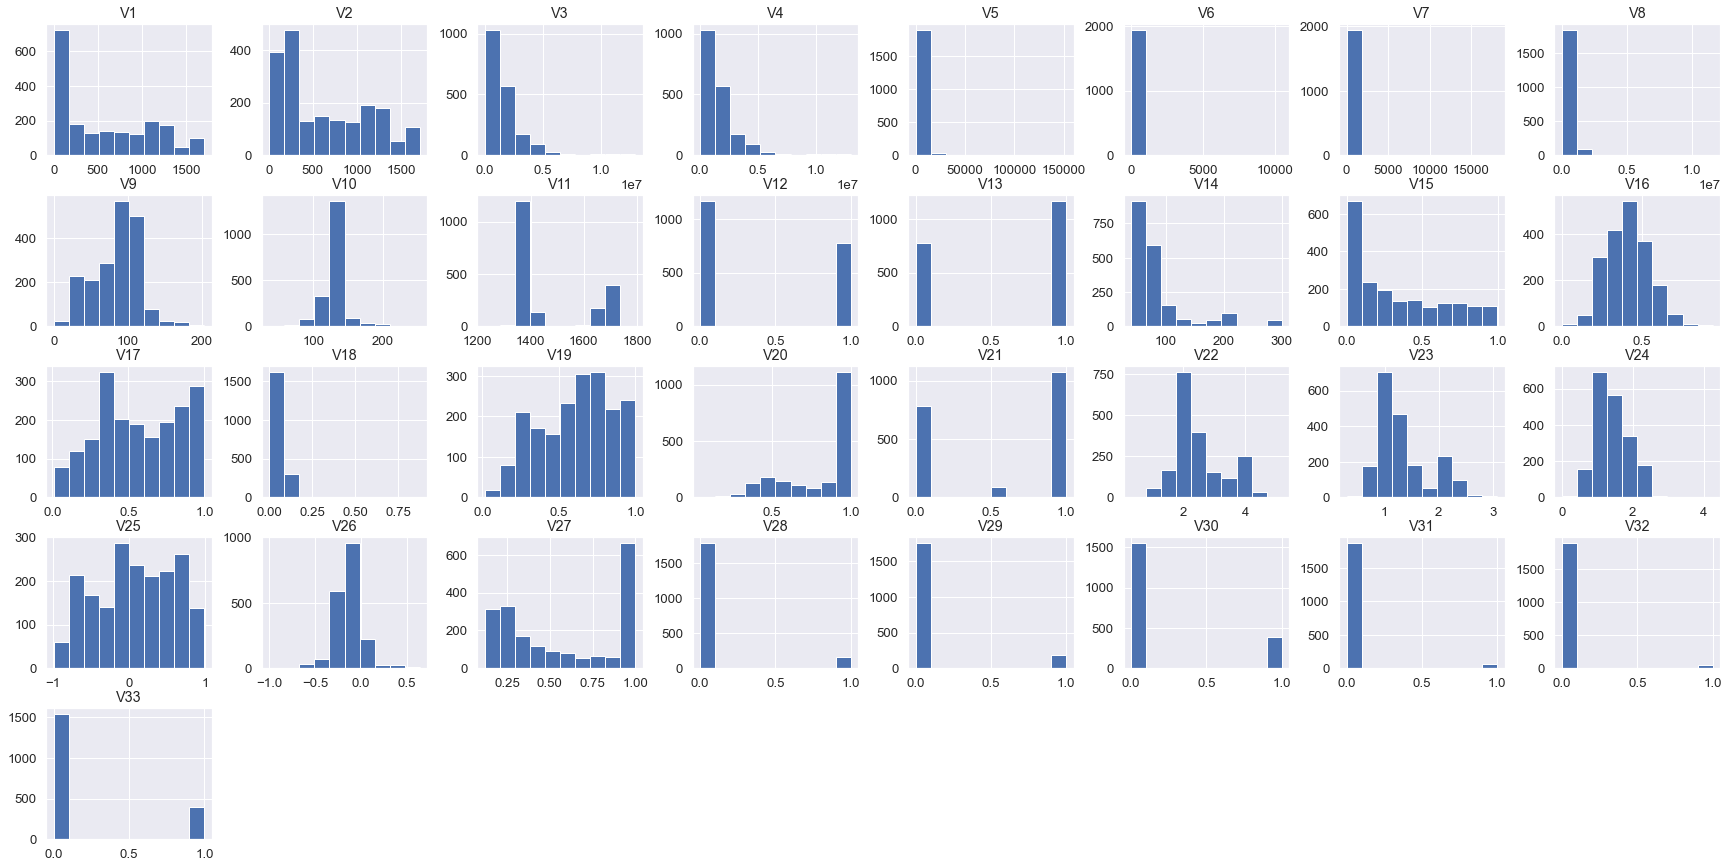

In [6]:
_ = steel.data.hist(figsize=(30, 15), layout=(5, 8))

### Split Data

In [7]:
from sklearn.model_selection import train_test_split
X, y = steel.data, steel.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

### Train DummyClassifer

In [8]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='prior').fit(X_train, y_train)
dc.score(X_test, y_test)

0.6522633744855967

### Train KNN based model

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

knc = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
knc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [10]:
knc.score(X_test, y_test)

0.9876543209876543

## Exercise 1

1. Load the wisconsin breast cancer dataset from `sklearn.datasets.load_breast_cancer`.
2. Is the labels imbalanced? (**Hint**: `value_counts`)
3. Split the data into a training and test set.
4. Create a pipeline with a `StandardScaler` and `LogisticRegression` and fit on the training set.
5. Evalute the pipeline on the test set.
6. **Extra**: Use `sklearn.metrics.f1_score` to compute the f1 score on the test set.

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

**If you are running locally**, you can uncomment the following cell to load the solution into the cell. On **Google Colab**, [see solution here](https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2/blob/master/notebooks/solutions/00-ex01-solutions.py). 

In [ ]:
# %load solutions/00-ex01-solutions.py